First, import needed modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Initalize variables

In [4]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Import datasets

In [5]:
ltw = pd.read_csv(f'{path}/data/ltw_treat.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})

View summary statistics

In [208]:
columns = ['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']
ltw.describe().to_csv(f'{path}/tables/ltw/ltw_descriptives.csv', sep=';', encoding='utf-8-sig', decimal=',', columns=columns, float_format='%.2f')
ltw[columns].describe()

,Union,SPD,FDP,Linke,Grüne,Andere
count,14319.000000,14316.000000,14259.000000,14311.000000,14280.000000,14319.000000
mean,41.472536,19.724475,6.319968,7.406899,8.325754,16.856586
std,11.183494,11.567003,3.828827,9.121070,4.967469,10.588800
min,5.797101,0.000000,0.000000,0.202429,0.000000,0.000000
25%,33.668402,10.117269,3.450118,2.198791,4.625162,7.847499
50%,40.861027,17.197551,5.677155,3.601695,7.245246,15.619877
75%,48.653924,28.269766,8.216152,6.122824,10.942920,24.315730
max,95.454545,58.673469,55.555556,47.500000,38.003901,71.186441


In [209]:
ltw['year'].value_counts().to_csv(f'{path}/tables/ltw/ltw_obsyears.csv', sep=';', encoding='utf-8-sig', decimal=',', float_format='%.2f')

Calculate average vote shares in all years by treatment type

In [210]:
avg_dfs = {2010: 'treatment_09', 2014: 'treatment_13'} # does not make sense to plot for treatment in 2005 --> no data
for year, treatment in avg_dfs.items():
    avg_dfs[year] = ltw[['Land','Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', treatment, 'year']].groupby(['Land', treatment, 'year'], as_index = False).mean()
    avg_dfs[year].rename(columns = {f'{treatment}':'treatment'}, inplace = True)
    mean = ltw[['Land', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'year']].groupby(['Land', 'year'], as_index = False).mean()
    mean['treatment'] = 'Mean'
    avg_dfs[year] = pd.concat([avg_dfs[year], mean])
avg_dfs[2010].head(15)

,Land,treatment,year,Union,SPD,FDP,Linke,Grüne,Andere
0,BY,Direct Line,2008,48.745979,27.196271,4.437926,3.438301,4.147399,12.117751
1,BY,Direct Line,2013,47.476370,27.294037,2.461825,1.440152,4.526262,16.846833
2,BY,Direct Line,2018,45.750397,17.326162,2.467114,2.871319,8.737696,22.952205
3,BY,None,2008,47.301936,14.173849,6.980801,3.713219,7.849922,20.095036
4,BY,None,2013,52.799455,15.732923,2.634354,1.695167,6.907168,20.338346
5,BY,None,2018,41.535522,7.386217,4.082640,2.400528,13.548669,31.162162
6,BY,Within 15km,2008,47.069254,25.960231,4.841103,4.043531,4.094940,14.108025
7,BY,Within 15km,2013,48.102660,26.072272,1.988766,1.755293,4.461272,17.769202
8,BY,Within 15km,2018,42.495733,16.874959,3.504479,2.569927,9.441417,25.215061
9,BY,Within 30km,2008,48.924059,20.326455,5.532564,4.299898,5.178007,15.853728


For each state, plot the average vote shares over years for treated and untreated municipalities

In [211]:
states = {'BY': 'Bavaria', 'HE': 'Hesse', 'NW': 'North-Rhine Westphalia', 'NI': 'Lower Saxony', 'TH': 'Thuringia'}
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km', 'Mean']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666', 'blue']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c', '#e06666', 'blue']
yellows = ['#ffd075', '#ffc75c', '#ffbe42', '#ffb529', '#ffac0f', 'blue']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6', '#b266b2', 'blue']
greens = ['#008000', '#198c19', '#329932', '#4ca64c' , '#66b266', 'blue']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6', '#b2b2b2', 'blue']
markers = ['o', 's', 'v', 'D', '^', 'h']

for year, df in avg_dfs.items():
    for abb, state in states.items():
        # keep only obs. corresponding to state
        state_data = df[df['Land'] == abb]
        # get years in a list
        years = state_data.year.unique().astype(int).tolist()
        # initialize figure 
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
        # set x labels
        plt.setp(axes, xticks=years)
        # set legend font size
        plt.rc('legend',fontsize=6)
        # title for entire figure
        fig.suptitle(f'{state} State Parliament Elections \n Average Vote Shares by treatment status in {year}', fontsize=20)

        for i, treatment in enumerate(treatments):
            plot_data = state_data[state_data['treatment'] == treatment]
            # set ls
            if treatment == 'Mean':
                ls = '--'
            else:
                ls = '-'
            # edit subplots
            axes[0, 0].set_title('Union', fontsize=12)
            axes[0, 0].set_ylabel('% Votes', fontsize=10)
            axes[0, 0].plot(plot_data['year'], plot_data['Union'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[0, 0].legend(loc='lower left')
            axes[0, 0].axvline(x=year, c='red', ls='--')

            axes[0, 1].set_title('SPD', fontsize=12)
            axes[0, 1].set_ylabel('% Votes', fontsize=10)
            axes[0, 1].plot(plot_data['year'], plot_data['SPD'], c=reds[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[0, 1].legend(loc='lower left')
            axes[0, 1].axvline(x=year, c='red', ls='--')

            axes[1, 0].set_title('FDP', fontsize=12)
            axes[1, 0].set_ylabel('% Votes', fontsize=10)
            axes[1, 0].plot(plot_data['year'], plot_data['FDP'], c=yellows[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[1, 0].legend(loc='upper left')
            axes[1, 0].axvline(x=year, c='red', ls='--')

            axes[1, 1].set_title('Linke', fontsize=12)
            axes[1, 1].set_ylabel('% Votes', fontsize=10)
            axes[1, 1].plot(plot_data['year'], plot_data['Linke'], c=purples[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[1, 1].legend(loc='upper left')
            axes[1, 1].axvline(x=year, c='red', ls='--')

            axes[2, 0].set_title('Grüne', fontsize=12)
            axes[2, 0].set_ylabel('% Votes', fontsize=10)
            axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], c=greens[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[2, 0].legend(loc='upper left')
            axes[2, 0].axvline(x=year, c='red', ls='--')

            axes[2, 1].set_title('Andere', fontsize=12)
            axes[2, 1].set_ylabel('% Votes', fontsize=10)
            axes[2, 1].plot(plot_data['year'], plot_data['Andere'], c=greys[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[2, 1].legend(loc='upper left')
            axes[2, 1].axvline(x=year, c='red', ls='--')

        # Save figure
        fig.savefig(f'{path}/figures/ltw/ltw_{abb}_{year}_vote_shares.png')
        plt.close()

Plot vote shares by ever treated status

In [212]:
avg_ever_treated = ltw[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'ever_treated', 'year', 'Land']].groupby(['ever_treated', 'year', 'Land'], as_index = False).mean()
avg_ever_treated.rename(columns = {'ever_treated':'treatment'}, inplace = True)
mean = ltw[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'year', 'Land']].groupby(['year', 'Land'], as_index = False).mean()
mean['treatment'] = 'Mean'
avg_ever_treated = pd.concat([avg_ever_treated, mean])
avg_ever_treated.head()

,treatment,year,Land,Union,SPD,FDP,Linke,Grüne,Andere
0,Direct Line,2008,BY,50.648776,17.357892,5.580233,4.668333,6.324517,15.526395
1,Direct Line,2008,NI,45.745353,30.217188,8.352733,5.881016,6.105751,3.697959
2,Direct Line,2009,HE,40.749525,27.846421,14.481551,4.747223,8.372927,3.802353
3,Direct Line,2009,TH,35.765408,16.763582,8.035187,25.205000,4.391152,10.277179
4,Direct Line,2010,NW,38.899743,32.516915,7.248968,4.824928,10.464893,6.044553


In [213]:
states = {'BY': 'Bavaria', 'HE': 'Hesse', 'NW': 'North-Rhine Westphalia', 'NI': 'Lower Saxony', 'TH': 'Thuringia'}
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km', 'Mean']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666', 'blue']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c', '#e06666', 'blue']
yellows = ['#ffd075', '#ffc75c', '#ffbe42', '#ffb529', '#ffac0f', 'blue']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6', '#b266b2', 'blue']
greens = ['#008000', '#198c19', '#329932', '#4ca64c' , '#66b266', 'blue']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6', '#b2b2b2', 'blue']
markers = ['o', 's', 'v', 'D', '^', 'h']


for abb, state in states.items():
    # keep only obs. corresponding to state
    state_data = avg_ever_treated[avg_ever_treated['Land'] == abb]
    # get years in a list
    years = state_data.year.unique().astype(int).tolist()
    # initialize figure 
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
    # set x labels
    plt.setp(axes, xticks=years)
    # set legend font size
    plt.rc('legend',fontsize=6)
    # title for entire figure
    fig.suptitle(f'{state} State Parliament Elections \n Average Vote Shares by ever-treated status', fontsize=20)

    for i, treatment in enumerate(treatments):
        plot_data = state_data[state_data['treatment'] == treatment]
        # set ls
        if treatment == 'Mean':
            ls = '--'
        else:
            ls = '-'
        # edit subplots
        axes[0, 0].set_title('Union', fontsize=12)
        axes[0, 0].set_ylabel('% Votes', fontsize=10)
        axes[0, 0].plot(plot_data['year'], plot_data['Union'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[0, 0].legend(loc='lower left')

        axes[0, 1].set_title('SPD', fontsize=12)
        axes[0, 1].set_ylabel('% Votes', fontsize=10)
        axes[0, 1].plot(plot_data['year'], plot_data['SPD'], c=reds[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[0, 1].legend(loc='lower left')

        axes[1, 0].set_title('FDP', fontsize=12)
        axes[1, 0].set_ylabel('% Votes', fontsize=10)
        axes[1, 0].plot(plot_data['year'], plot_data['FDP'], c=yellows[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[1, 0].legend(loc='upper left')

        axes[1, 1].set_title('Linke', fontsize=12)
        axes[1, 1].set_ylabel('% Votes', fontsize=10)
        axes[1, 1].plot(plot_data['year'], plot_data['Linke'], c=purples[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[1, 1].legend(loc='upper left')

        axes[2, 0].set_title('Grüne', fontsize=12)
        axes[2, 0].set_ylabel('% Votes', fontsize=10)
        axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], c=greens[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[2, 0].legend(loc='upper left')

        axes[2, 1].set_title('Andere', fontsize=12)
        axes[2, 1].set_ylabel('% Votes', fontsize=10)
        axes[2, 1].plot(plot_data['year'], plot_data['Andere'], c=greys[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[2, 1].legend(loc='upper left')

    # Save figure
    fig.savefig(f'{path}/figures/ltw/ltw_{abb}_ever_vote_shares.png')
    plt.close()

Plot maps with the partys who won the elections and treatment status

LTW winners

In [9]:
# Load shapefiles
import geopandas as gpd
municipalities = gpd.read_file(f'{path}/data/geodata/municipalities.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
powerlines = gpd.read_file(f'{path}/data/geodata/all_powerlines.shp')
powerlines = powerlines.set_geometry('geometry')
powerlines['year'] = powerlines['year'].astype(int)
# set year to treatment year
powerlines['year'] = np.where(powerlines['year'] == 2013, 2014, powerlines['year'])
powerlines['year'] = np.where(powerlines['year'] == 2009, 2010, powerlines['year'])

In [10]:
# Replace State IDs with Abbreviations 
abb = {'01': 'SH', '02': 'HH', '03': 'NI', '04': 'HB', '05': 'NW', '06': 'HE', '07': 'RP', '08': 'BW', \
         '09': 'BY', '10': 'SL', '11': 'BE', '12': 'BB', '13': 'MV', '14': 'SN', '15': 'ST', '16': 'TH'}
for key, value in abb.items():
    municipalities['SN_L'] = np.where(municipalities['SN_L'] == key, value, municipalities['SN_L'])
    states['SN_L'] = np.where(states['SN_L'] == key, value, states['SN_L'])

In [11]:
# Prepare df with election winners
ltw_win = ltw[['AGS', 'Land', 'year', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']]
ltw_win['winner'] = ltw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)
ltw_win = ltw_win[['AGS', 'Land', 'year', 'winner']]
ltw_win['winner'].describe()

# add color column to df
colors = {'Union': '#000000', 'SPD': '#cc0000', 'FDP': '#ffff00', 'Grüne': '#008000', 'Linke': '#800080', 'Andere': '#808080'}
ltw_win['color'] = 0
for party, color in colors.items():
    ltw_win['color'] = np.where(ltw_win['winner'] == party, color, ltw_win['color'])

# Merge winners and municipalities
ltw_win_plot = pd.merge(ltw_win, municipalities, on='AGS')
ltw_win_plot = ltw_win_plot.set_geometry('geometry')

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_7806/2492951917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltw_win['winner'] = ltw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)


Treatment status

In [18]:
# First subset ltw and rename columns
ltw_treat = ltw[['AGS', 'year', 'Land', 'treatment_05', 'ever_treated_2010', 'ever_treated']]
ltw_treat.rename(columns = {'treatment_05':'t2005', 'ever_treated_2010':'t2010', 'ever_treated':'t2014'}, inplace = True)
# Merge win and municipalities
municipalities = municipalities[['AGS', 'GEN', 'SN_L', 'geometry']]
ltw_treatment_plot = pd.merge(ltw_treat, municipalities, on='AGS')
ltw_treatment_plot = ltw_treatment_plot.set_geometry('geometry')
ltw_treatment_plot.columns

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_7806/246523796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltw_treat.rename(columns = {'treatment_05':'t2005', 'ever_treated_2010':'t2010', 'ever_treated':'t2014'}, inplace = True)


Index(['AGS', 'year', 'Land', 't2005', 't2010', 't2014', 'GEN', 'SN_L',
       'geometry'],
      dtype='object')

Plot maps

/opt/homebrew/Caskroom/miniconda/base/envs/vscode/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/homebrew/Caskroom/miniconda/base/envs/vscode/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/homebrew/Caskroom/miniconda/base/envs/vscode/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning:

KeyboardInterrupt: 

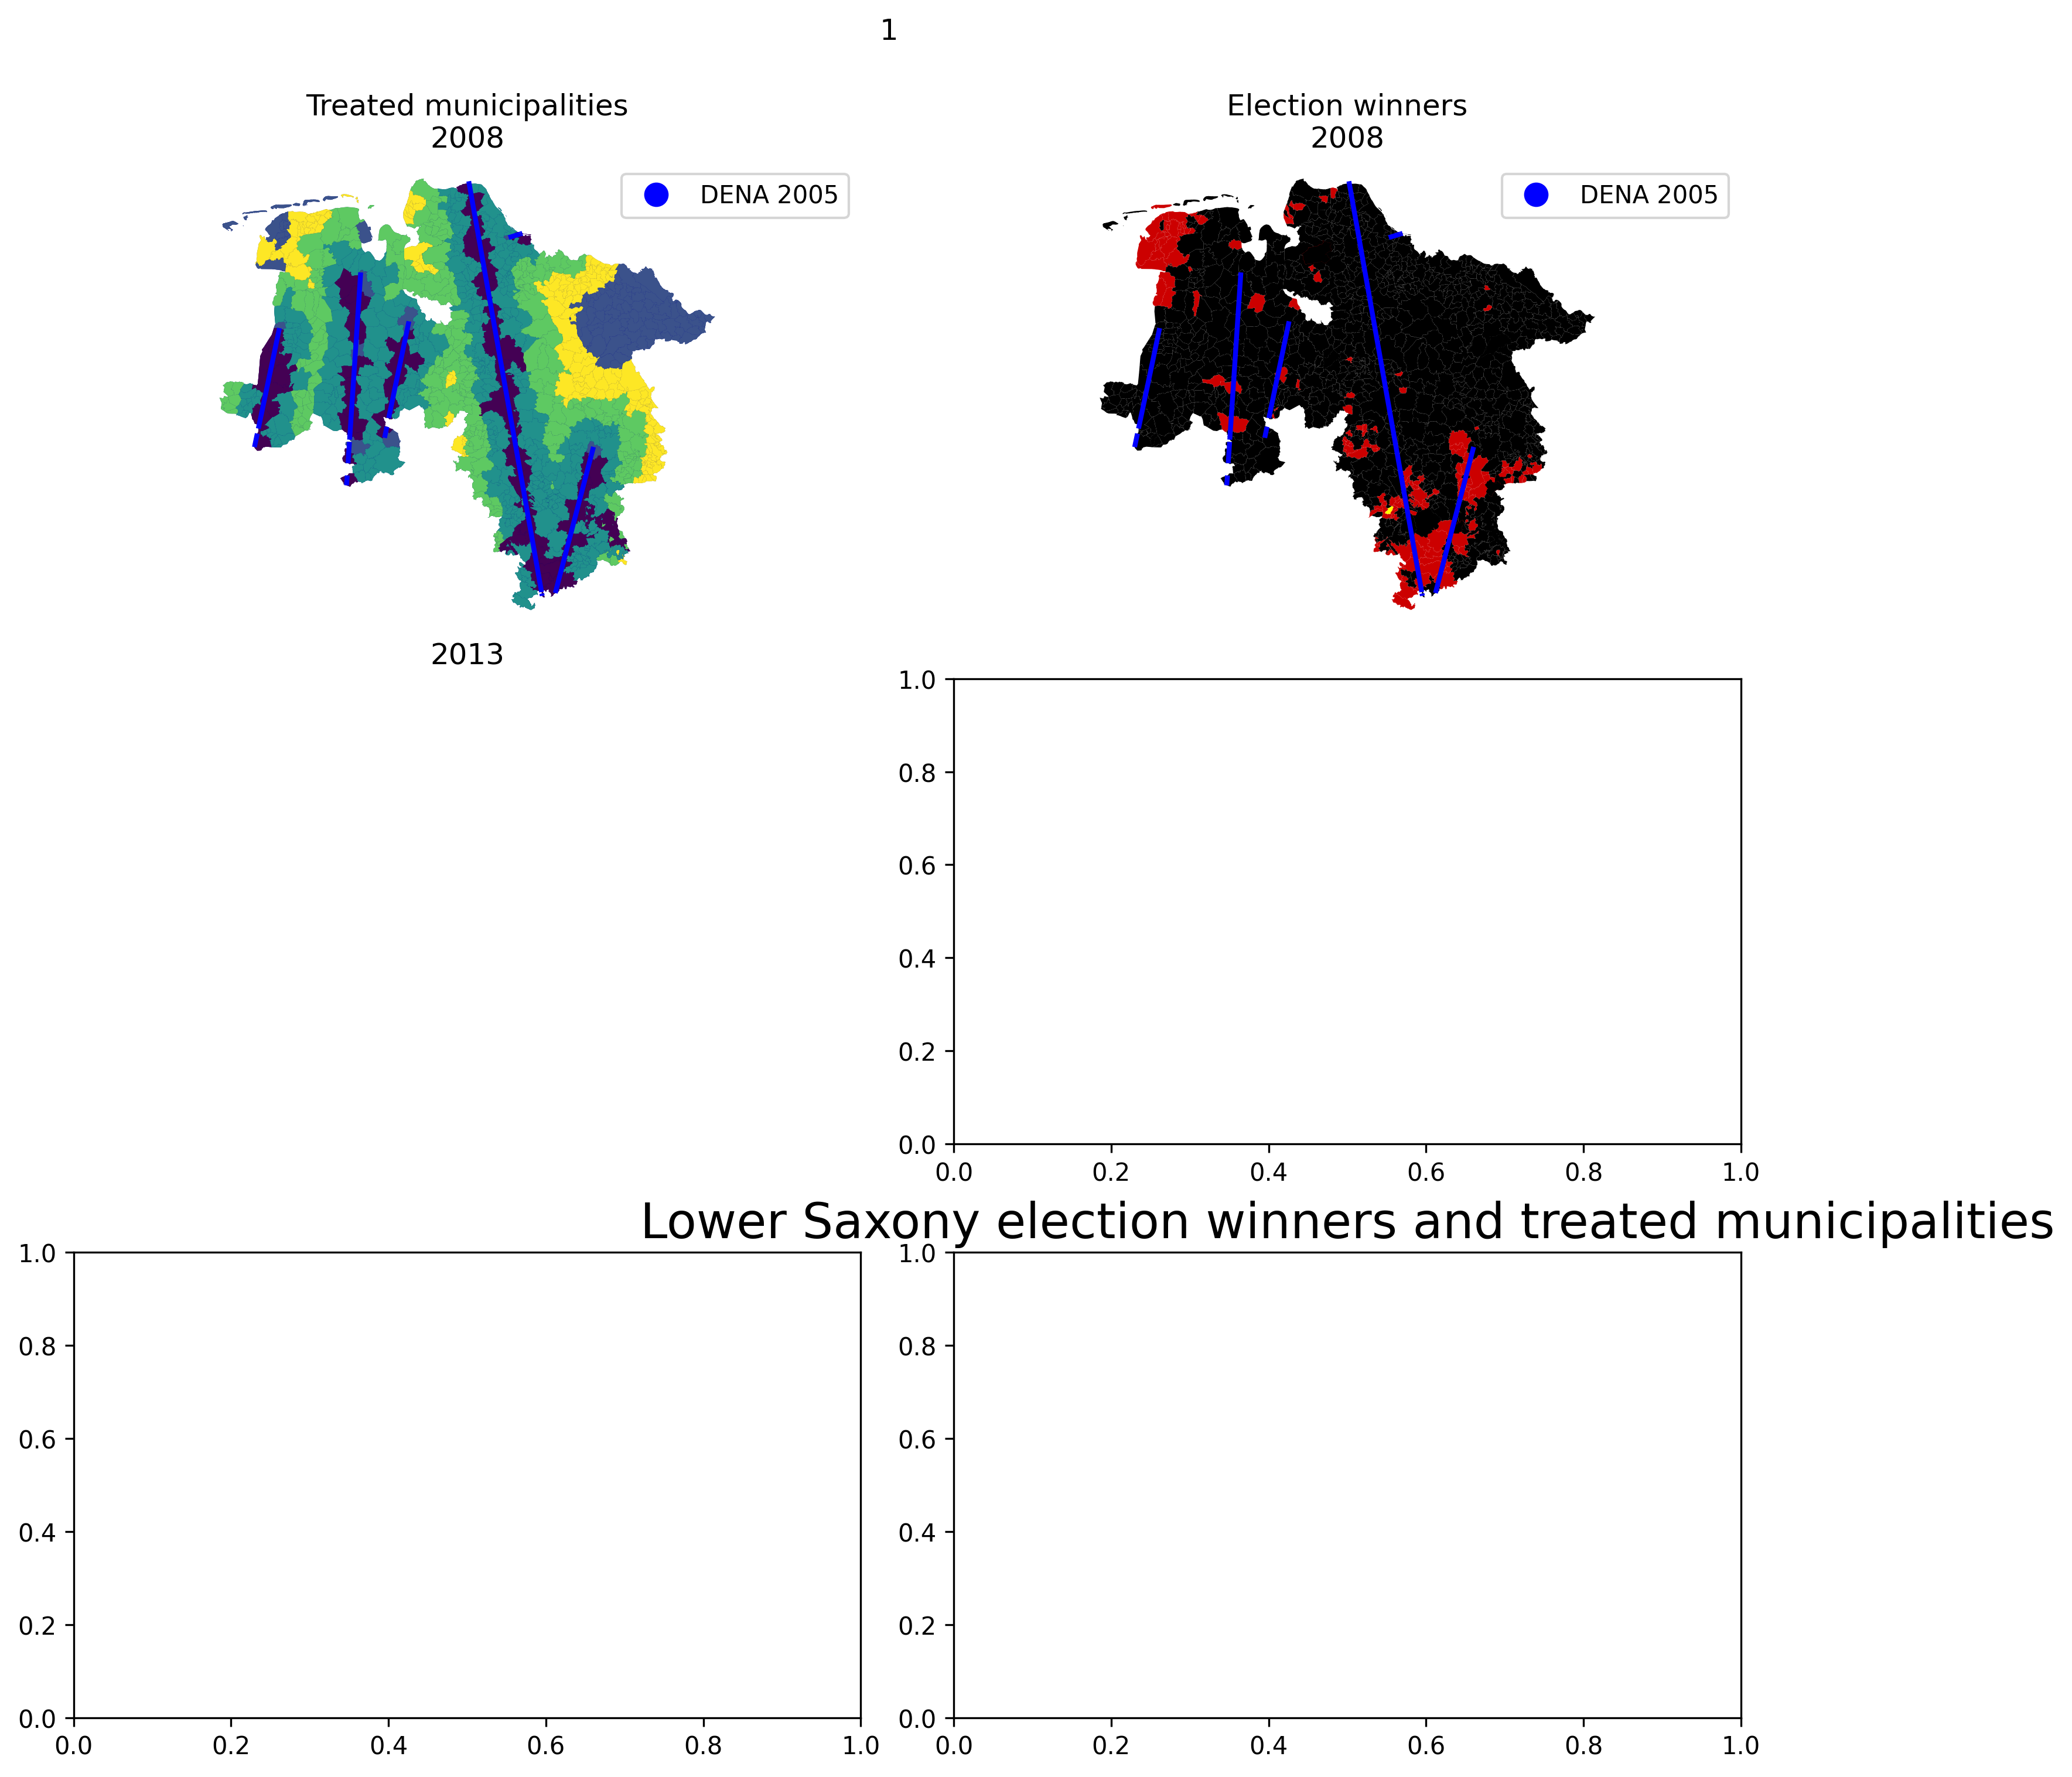

In [33]:
from geopandas.tools import overlay
abb = {'BY': 'Bavaria', 'HE': 'Hesse', 'NW': 'North-Rhine Westphalia', 'NI': 'Lower Saxony', 'TH': 'Thuringia'}
legend_dict = {2005: 'DENA 2005', 2010: 'EnLAG 2009', 2014: 'BBPlG 2013'}
for abb, state in abb.items():
    # keep only obs. corresponding to state
    state_winners = ltw_win_plot[ltw_win_plot['Land'] == abb]
    state_treated = ltw_treatment_plot[ltw_treatment_plot['Land'] == abb]
    state_treated['year'] = state_treated['year'].astype(str)
    states_plot = states[states['SN_L'] == abb]
    # keep only parts of powerlines that intersect state
    powerlines_state = powerlines.overlay(states_plot, how='intersection')
    # get years in a list
    years = state_winners.year.unique().astype(int).tolist()
    # initialize figure 
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300, constrained_layout=True)
    # title for entire figure
    fig.suptitle(f'{state} election winners and treated municipalities', fontsize=20)
    for i, year in enumerate(years):
        # subset df for year
        plot_winners = state_winners[state_winners['year'] == year]
        # subset powerlines
        plot_pl = powerlines_state[powerlines_state['year'] <= year]
        # draw subfigs
        # Treated municipalities in first column
        ax[i, 0].set_aspect('equal')
        ax[i, 0].set_adjustable('datalim', share=True)
        ax[i, 0].set_axis_off()

        if i == 0:
            ax[i, 0].set_title(f'\nTreated municipalities\n{year}')
        else: 
            ax[i, 0].set_title(f'{year}')
        if year >= 2005 and year < 2010:
            state_treated.plot(ax=ax[i, 0], column='t2005', cmap='viridis', legend=True, edgecolor='darkblue', lw=0.01, zorder=1)
        if year >= 2010 and year < 2014:
            state_treated.plot(ax=ax[i, 0], column='t2010', cmap='viridis', legend=True, edgecolor='darkblue', lw=0.01, zorder=1)
        if year >= 2014:
            state_treated.plot(ax=ax[i, 0], column='t2014', cmap='viridis', legend=True, edgecolor='darkblue', lw=0.01, zorder=1)
        # Powerlines 
        plot_pl.plot(ax=ax[i, 0], column='descriptio', cmap='winter', legend=True, lw=2, zorder=2)
        # Election winners in second column
        ax[i, 1].set_aspect('equal')
        ax[i, 1].set_adjustable('datalim', share=True)
        ax[i, 1].set_axis_off()
        if i == 0:
            ax[i, 1].set_title(f'\nElection winners\n{year}')
        else: 
            ax[i, 1].set_title(f'{year}')
        plot_winners.plot(ax=ax[i, 1], color=plot_winners['color'], lw=0.01, zorder=1)
        # Powerlines 
        plot_pl.plot(ax=ax[i, 1], column='descriptio', cmap='winter', legend=True, lw=2, zorder=2)

    plt.savefig(f'{path}/figures/ltw/{abb}_win_and_treat.png', bbox_inches="tight", pad_inches=0)
    plt.close()

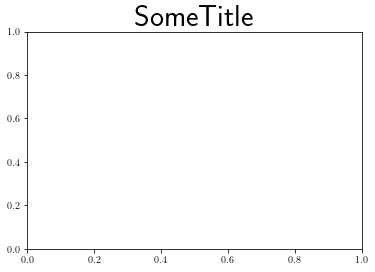

In [36]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
t = r'\fontsize{30pt}{3em}\selectfont{}{SomeTitle}'
plt.title( t )

plt.show()